In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [17]:
from sklearn.datasets import make_blobs
number=1000
n_clusters=5
X,y,op=make_blobs(n_samples=number,centers=n_clusters,n_features=2,random_state=42,return_centers=True)


In [19]:
op

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292],
       [ 2.02230023,  4.16145156]])

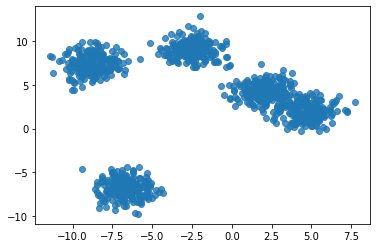

In [18]:
plt.scatter(X[:,0],X[:,1],alpha=0.8)
plt.show()

In [27]:
def calculateDistance(x1,y1,x2,y2):
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
     return dist


In [40]:
#centroids by randomly selecting data points from data itself
centroids=np.zeros([n_clusters,2]) #[[,],[,]......,[,]]
for j in range(n_clusters):
    val=np.random.choice(range(number))  #choosing a random number
    centroids[j][0]=X[val][0]
    centroids[j][1]=X[val][1]
flag=True        #indicator if centroids are not changing

epochs=200      #define the number of times to run the algorithm

for i in range(epochs):
    if(flag==False):  
        print("Stopped at epoch:",i)   
        break                       #stop if there is no change in cluster
    dict={}
    for j in range(n_clusters):     # n no of arrays to store cluster points
        dict[j]=[]
    #assigning each element into a cluster
    for a in X:                 
        distances=[]
        for q in range(n_clusters):     
            distances.append(calculateDistance(centroids[q][0],centroids[q][1],a[0],a[1]))
        
        index=np.argmin(distances,axis=0)  #take min index i.e nearest to which cluster
        dict[index].append([a[0],a[1]])    #assign datapoint to array 

    #calculating mean of each cluster
    new_centroids=np.zeros([n_clusters,2])  #initialize new_centroids points to calculate mean
    
    for j in range(n_clusters):
        val1=0
        val2=0
        count=1   # assign value to 1 instead of 0 because it may lead to zero division error
        for p in range(len(dict[j])):
            val1+=dict[j][p][0]
            val2+=dict[j][p][1]
            count+=1
        new_centroids[j][0]=val1/count
        new_centroids[j][1]=val2/count

    # check if centroids are changed:
    check_array=np.zeros([n_clusters]) 
    for j in range(n_clusters):   
    
        if(centroids[j][0]==new_centroids[j][0] and centroids[j][1]==new_centroids[j][1]):
            check_array[j]=1
    #val1=check_array.count[1]
    if(np.count_nonzero(check_array)==len(check_array)):  #if all values are 1 then there is no change between old and new clusters
        flag=False
    else:                                  #change old cluster points with new_cluster points
        for j in range(n_clusters):
            centroids[j][0]=new_centroids[j][0]
            centroids[j][1]=new_centroids[j][1]

print(new_centroids)
     
    

Stopped at epoch: 11
[[-8.7643767   7.3676023 ]
 [ 4.63595286  1.8856598 ]
 [-6.6530417  -6.77750702]
 [-2.49020059  8.99466436]
 [ 2.00615223  4.25045429]]


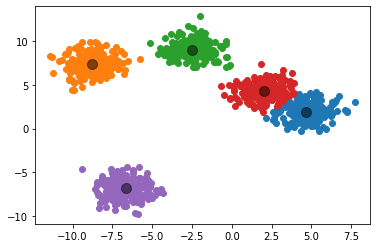

In [38]:
for k,v in dict.items():

    v=np.array(v)
    plt.scatter(v[:,0],v[:,1])
    plt.scatter(centroids[k][0],centroids[k][1],c='black', s=100, alpha=0.5)
plt.show()

In [41]:
#implementation using sklearn
kmeans=KMeans(n_clusters=n_clusters)
kmeans.fit(X)
print(kmeans.inertia_)
kmeans.cluster_centers_


1873.253011362829


array([[ 4.65960568,  1.89528052],
       [-8.80798056,  7.40425704],
       [-6.68630691, -6.81139455],
       [-2.50265159,  9.03963769],
       [ 2.01603476,  4.27139248]])

debugged part of implementation

In [ ]:
#centroids by randomly selecting data points from data itself
centroids=np.zeros([n_clusters,2]) #[[,],[,]......,[,]]
for j in range(n_clusters):
    val=np.random.choice(range(number))  #choosing a random number
    centroids[j][0]=X[val][0]
    centroids[j][1]=X[val][1]
flag=True        #indicator if centroids are not changing
#print(centroids) 
epochs=200      #define the number of times to run the algorithm

for i in range(epochs):
    if(flag==False):  
        print("Stopped at epoch:",i)   
        break                       #stop if there is no change in cluster
    dict={}
    for j in range(n_clusters):     # n no of arrays to store cluster points
        dict[j]=[]
    #assigning each element into a cluster
    for a in X:                 
        distances=[]
        for q in range(n_clusters):     
            distances.append(calculateDistance(centroids[q][0],centroids[q][1],a[0],a[1]))
        
        index=np.argmin(distances,axis=0)  #take min index i.e nearest to which cluster
        dict[index].append([a[0],a[1]])    #assign datapoint to array 

    #calculating mean of each cluster
    new_centroids=np.zeros([n_clusters,2])  #initialize new_centroids points to calculate mean
    """for k in dict.keys():
        print(dict[k])"""
    
    for j in range(n_clusters):
        val1=0
        val2=0
        count=1   # assign value to 1 instead of 0 because it may lead to zero division error
        for p in range(len(dict[j])):
            val1+=dict[j][p][0]
            val2+=dict[j][p][1]
            count+=1
        new_centroids[j][0]=val1/count
        new_centroids[j][1]=val2/count

    """print(new_centroids)
    print(centroids)"""
    # check if centroids are changed:
    check_array=np.zeros([n_clusters]) 
    for j in range(n_clusters):   
    
        if(centroids[j][0]==new_centroids[j][0] and centroids[j][1]==new_centroids[j][1]):
            check_array[j]=1
    #val1=check_array.count[1]
    if(np.count_nonzero(check_array)==len(check_array)):  #if all values are 1 then there is no change between old and new clusters
        flag=False
    else:                                  #change old cluster points with new_cluster points
        for j in range(n_clusters):
            centroids[j][0]=new_centroids[j][0]
            centroids[j][1]=new_centroids[j][1]
print(new_centroids)
     
    